In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import h5py
from tensorflow import keras
from glob import glob

In [3]:
import sys
sys.path.append('../')
sys.path.append('../..')

In [4]:
import config
#SIM="/gpfs/slac/atlas/fs1/d/rafaeltl/public/Muon/simulation/20220912/SIG_atlas_nsw_pad_z0_xya/"
DATA_LOC=config.DATA_LOC_VALIDATE

files=glob(f"{DATA_LOC}")

print(len(files))

148


In [5]:
model_name = "../models/MyTCN_CL4.3.1.0..4.3.3.0_DL20_CBNormFalse_DBNormFalse_IBNormFalse_penTrue_ptype0_regBiasTrue_lrate0.001_Flatten_L1R0.0005_DetMat_pc02_4Outputs_LONG_run22"
model = keras.models.load_model(model_name,compile=False)
np.save("exported_weights.npy",model.get_weights())

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [6]:
help(model)

Help on Functional in module tensorflow.python.keras.engine.functional object:

class Functional(tensorflow.python.keras.engine.training.Model)
 |  Functional(*args, **kwargs)
 |  
 |  A `Functional` model is a `Model` defined as a directed graph of layers.
 |  
 |  Three types of `Model` exist: subclassed `Model`, `Functional` model,
 |  and `Sequential` (a special case of `Functional`).
 |  In general, more Keras features are supported with `Functional`
 |  than with subclassed `Model`s, specifically:
 |  
 |  - Model cloning (`keras.models.clone`)
 |  - Serialization (`model.get_config()/from_config`, `model.to_json()/to_yaml()`
 |  - Whole-model saving (`model.save()`)
 |  
 |  A `Functional` model can be instantiated by passing two arguments to
 |  `__init__`. The first argument is the `keras.Input` Tensors that represent
 |  the inputs to the model. The second argument specifies the output
 |  tensors that represent the outputs of this model. Both arguments can be a
 |  nested st

In [7]:
y_test = np.load(f'/afs/cern.ch/user/r/rrojas/public/ML/r-dev-branch/si-mu-lator/hls4ml/Y_test_50000_detMat_atlas_nsw_pad_z0.npy')
x_test = np.load(f'/afs/cern.ch/user/r/rrojas/public/ML/r-dev-branch/si-mu-lator/hls4ml/X_test_50000_detMat_atlas_nsw_pad_z0.npy')
weights = np.load(f'exported_weights.npy', allow_pickle=True)


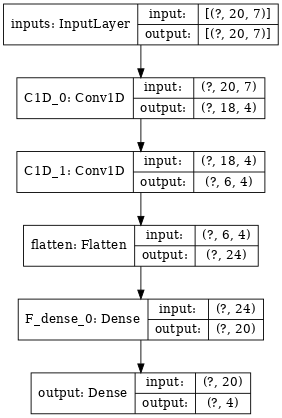

In [8]:
from tensorflow import keras as tfk
tfk.utils.plot_model(model,
    show_shapes=True,
#    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=64,
#    layer_range=None,
#    show_layer_activations=True
                    )

(8,)